### Project_Summary

**Domain: Healthcare**

The purpose is to design an AIML model which can predict the condition of the patient depending on the received test results.

The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

Below are features:
1. P_incidence 2. P_tilt 3. L_angle 4. S_slope 5. P_radius 6. S_degree 7. Class

Tasks performed:

1. Importing and cleaning the data
2. Data analysis and visualisation
3. Data preprocessing
4. Model training, testing and tuning
5. Conclusion


## Importing and merging the data sets

In [1081]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1082]:
#Loading the csv files
df1=pd.read_csv("Part1 - Normal.csv")
df2=pd.read_csv("Part1 - Type_H.csv")
df3=pd.read_csv("Part1 - Type_S.csv")

In [1083]:
#Checking the size and shape of the data sets
print(df1.shape)
print(df2.shape)
print(df3.shape)

(100, 7)
(60, 7)
(150, 7)


3 data sets have 7 columns each

In [1084]:
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [1085]:
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [1086]:
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


All 3 data sets have same column names 

**Merging the 3 data sets**

In [1087]:
df=df1.append([df2,df3])
df.shape

(310, 7)

## Checking the null values

In [1088]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [1089]:
df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

All columns have no null values and data types are float

**Checking the Class column unique values**

In [1090]:
df['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

**1.** Class column has 6 unique values

**2.** Same value has been given different names with slight name changes like Type_S and ty_s both are same.

**So we can replace the alternate names with one common name**

In [1091]:
df_new=df.replace({'Class': {'Nrmal':'Normal', 'type_h':'Type_H','tp_s':'Type_S'}})

In [1092]:
print(df_new.Class.unique())
print(df_new['Class'].value_counts())

['Normal' 'Type_H' 'Type_S']
Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64


**Now only three unique values are present in the Class column**

## Visualisation

<AxesSubplot:xlabel='Class', ylabel='Count'>

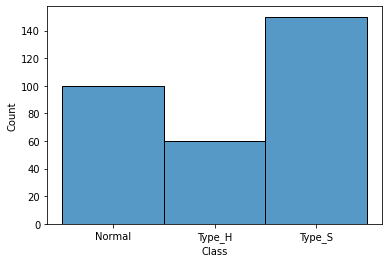

In [1093]:
sns.histplot(df_new['Class'])

This data is imbalanced. If the data set contains more number of rows for Type_H class, it would be balanced

<AxesSubplot:xlabel='Class', ylabel='S_Degree'>

<Figure size 1728x720 with 0 Axes>

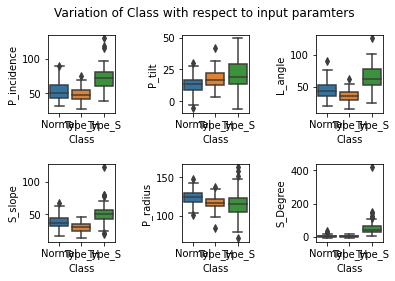

In [1094]:
plt.figure(figsize=(24,10))
fig, ax = plt.subplots(2, 3)
fig.tight_layout(pad=3.0)
fig.suptitle("Variation of Class with respect to input paramters")

sns.boxplot(data=df_new,x='Class',y='P_incidence',ax=ax[0,0])
sns.boxplot(data=df_new,x='Class',y='P_tilt',ax=ax[0,1])
sns.boxplot(data=df_new,x='Class',y='L_angle',ax=ax[0,2])
sns.boxplot(data=df_new,x='Class',y='S_slope',ax=ax[1,0])
sns.boxplot(data=df_new,x='Class',y='P_radius',ax=ax[1,1])
sns.boxplot(data=df_new,x='Class',y='S_Degree',ax=ax[1,2])

**1.** P_incidence median is high for Type_S, low for Type_H and average for Normal

**2.** P_tilt median is high for Type_S, low for Normal and average for Type_H

**3.** L_angle median is high for Type_S, low for Type_H and average for Normal

**4.** S_slope median is high for Type_S, low for Type_H and average for Normal

**5.** P_radius median is high for Normal, low for Type_S and average for Type_H

**6.** S_Degree median is high for Type_S, and almost equal for Type_H and Normal

**Generally Type_S class has all parameters high except P_radius**

**Type_H has all parameters low except P_tilt and P_radius**

**Normal has all parameters average except P_tilt and and P_radius**

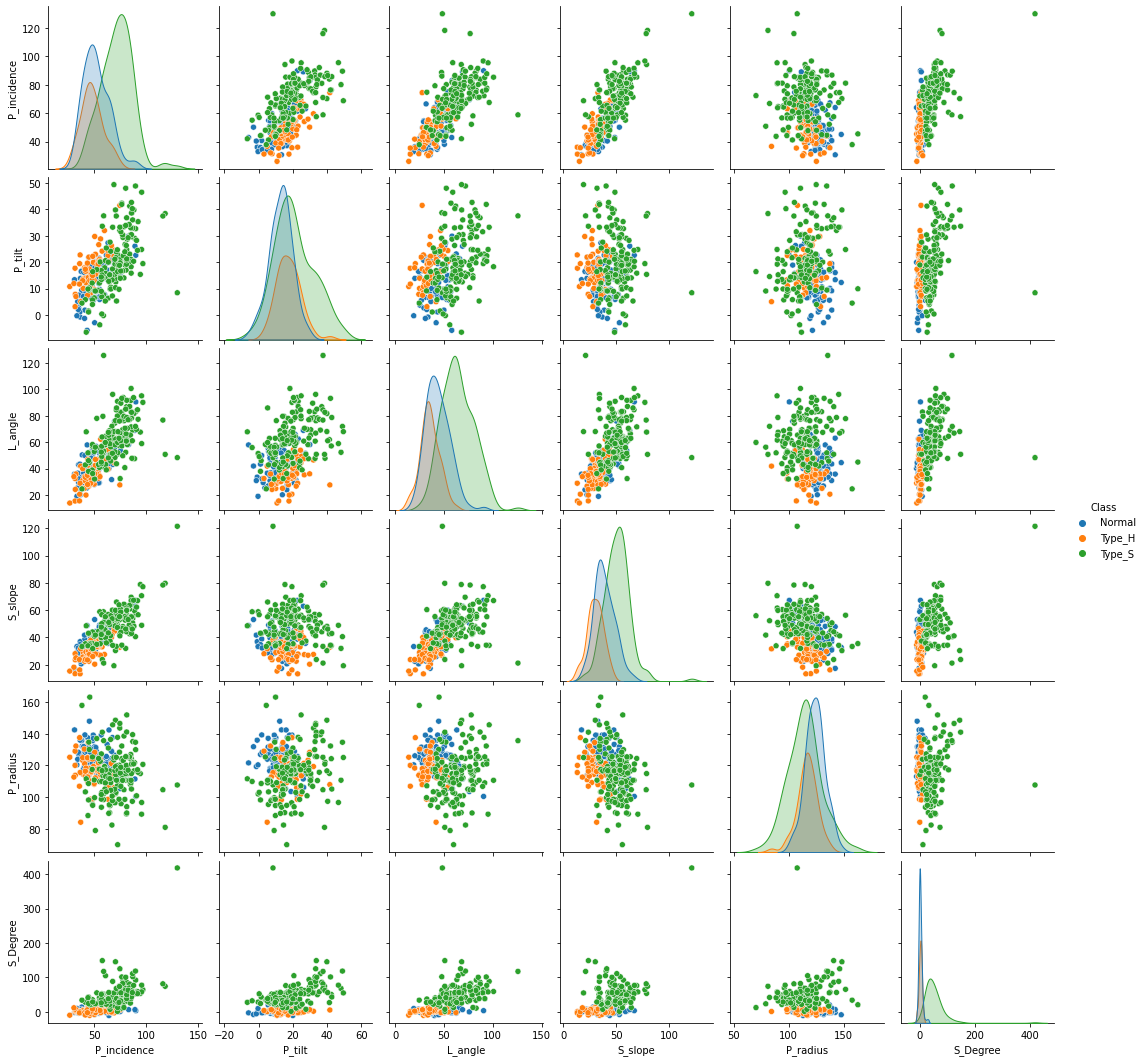

In [1095]:
sns.pairplot(df_new,hue='Class')

In [1096]:
df_new.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


**There is no much correlation among the parameters, so we need not remove any columns**

In [1097]:
#Encoding the Class column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['Class'] = le.fit_transform(df_new['Class'])
df_new.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0


## Segregating the predictor and target variables

In [1098]:
X=df_new.drop('Class',axis=1)
Y=df_new['Class']

In [1099]:
print(X.shape)
print(Y.shape)

(310, 6)
(310,)


**Perform Normalisation**

In [1100]:
from sklearn.preprocessing import StandardScaler

In [1101]:
X_std=pd.DataFrame(StandardScaler().fit_transform(X))
X_std.columns=X.columns

In [1102]:
X_std.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,-1.277922,-0.057898,-0.907904,-1.597803,0.730468,-0.488288
1,-0.324010,0.142672,-0.017786,-0.522437,0.596124,-0.647896
2,-0.937559,-0.860412,-0.271475,-0.562386,0.849889,-0.568091
3,-0.707649,-0.009077,-0.212206,-0.901920,0.831811,-0.725568
4,-0.859732,-0.688835,-0.504914,-0.590377,0.921914,-0.791650


In [1103]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [1104]:
print(X_train.shape)
print(y_train.shape)

(248, 6)
(248,)


In [1105]:
print(X_test.shape)
print(y_test.shape)

(62, 6)
(62,)


**Implementing the knn classifier for different k values**

In [1106]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

Accuracy_score=[]#Empty list to append accuracy scores for diff k values

N=list(np.arange(3,20,2))
for k in N:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc_score=metrics.accuracy_score(y_test,y_pred)
    F_score=metrics.f1_score(y_test,y_pred,average=None)
    Accuracy_score.append(acc_score)
    
    print(acc_score)
    print(F_score)

0.8548387096774194
[0.8    0.7    0.9375]
0.8387096774193549
[0.76190476 0.73684211 0.92063492]
0.8225806451612904
[0.7027027  0.69565217 0.9375    ]
0.8064516129032258
[0.68421053 0.72727273 0.90625   ]
0.7903225806451613
[0.68421053 0.63636364 0.90625   ]
0.7903225806451613
[0.68421053 0.63636364 0.90625   ]
0.7903225806451613
[0.68421053 0.63636364 0.90625   ]
0.8387096774193549
[0.76923077 0.76190476 0.90625   ]
0.8225806451612904
[0.75       0.66666667 0.92063492]


In [1107]:
#Finding the misclassification error for different k values
MSE=[1-x for x in Accuracy_score]

In [1108]:
#Considering the k as Optimal value for which MSE is minimum
Opt_k=N[MSE.index(min(MSE))]
print(Opt_k)

3


Text(0, 0.5, 'Misclassification error')

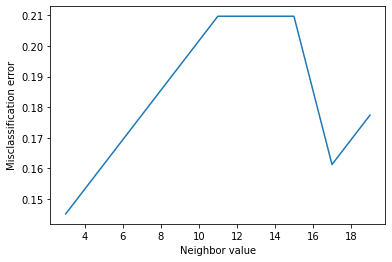

In [1109]:
#Plotting the misclassfication error vs k
plt.plot(N,MSE)
plt.xlabel('Neighbor value')
plt.ylabel('Misclassification error')

**Optimal value for k is 3 with accuracy score of 85 and good F1 score for individual Class types**

In [1110]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred_train=knn.predict(X_train)
print("Train Data accuracy:"+str(metrics.accuracy_score(y_train,y_pred_train)))
print("Test Data accuracy:"+str(metrics.accuracy_score(y_test,y_pred)))

Train Data accuracy:0.9153225806451613
Test Data accuracy:0.8548387096774194


For k value 3, model has training accuracy of 91% and test accuracy of 85%

In [1111]:
print(metrics.f1_score(y_test,y_pred,average=None))

[0.8    0.7    0.9375]


              precision    recall  f1-score   support

           0       0.73      0.89      0.80        18
           1       0.78      0.64      0.70        11
           2       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.86      0.85      0.86        62



<AxesSubplot:>

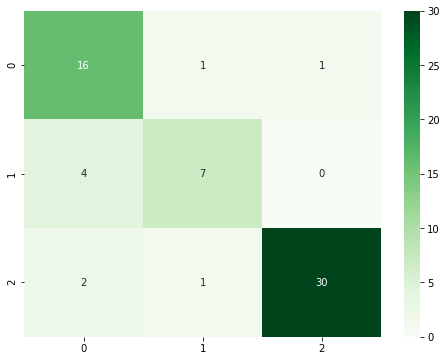

In [1112]:
print(classification_report(y_test, y_pred, digits=2))
Log_conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
plt.figure(figsize = (8,6))
sns.heatmap(Log_conf_mat, annot=True,cmap='Greens', fmt='g')

Normal and Type_S have good recall ratio of 0.89 and 0.91 respectively and Type_H has less recall ratio, 0.64. One reason might be data set has less data for Type_H class

## Improvisation

**1.** The output column, has intially 6 unique values, but those are duplicates of each other i.e.; 'Nrmal' and 'Normal', 'type_h' and 'Type_H', 'tp_s' and 'Type_S'.

**If the output column has proper unique values, it will take less time to process the data**

**Why because,if output has more number of values like this, it will be difficult to find which are similar**

**2** If dataset is balanced i.e.; if more number of rows are there for Type_H class, model would have been trained with good recall ratio.